<a href="https://colab.research.google.com/github/Pathway2008/churn/blob/main/chrun_analysis(201224).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from google.colab import drive
drive.mount('/content/drive/')

# 1.Preprocessing

##1)데이터 보기

In [ ]:
file = pd.read_csv("/content/drive/MyDrive/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")   

##2)데이터 타입 및 크기 파악

In [ ]:
print(file.shape) # (7043, 21)
print(file.info()) # 결측값 없음

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

## 3)데이터 타입 변환

In [ ]:
file.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
file.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
# 조건1 - 만일 PhoneService가 No 라면 MultipleLines 값은 No 변경할 것
file.loc[file["PhoneService"] == "No", "MultipleLines"] = "No"
file.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
# 조건2 - 만일 InternetService 가 No 라면 Online~ 값은 No 변경할 것
file.loc[file["InternetService"] == "No", ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]] = "No"
file.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
file['SeniorCitizen'] = file['SeniorCitizen'].astype(object)

In [ ]:
file['TotalCharges'] = pd.to_numeric(file['TotalCharges'], errors='coerce')
file.info() # 타입 변환 후엔 반드시 확인 -> 7032로 변환 되어있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 4)공백/중복값 확인



In [ ]:
file.isnull().sum() # 공백 확인

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## 5)결측값 처리

In [ ]:
file['TotalCharges'].replace(' ', np.nan, inplace=True)
file.dropna(axis = 0, inplace=True) # total 없는 건 0년차 가입이기 때문 -> 그냥 삭제 
file.info()
file.isnull().sum() # 공백 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 2.탐색적 데이터 분석(EDA)

## 1)종속변수 분포 파악 및 처리

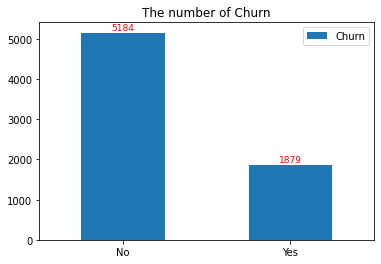

No     5163
Yes    1869
Name: Churn, dtype: int64


In [ ]:
x = [0,1]
y = [5174,1869]

file['Churn'].value_counts().plot(kind='bar')
plt.title('The number of Churn')
plt.xticks(rotation=0.5)
plt.legend(loc='best')

for i, v in enumerate(x):
    plt.text(v, y[i]+10, y[i]+10,                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='red',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()
print(file['Churn'].value_counts())

# 불균형 데이터 -> accuracy 보다는 f1 score 이용

###1-1)이탈=1/이탈x=0

In [ ]:
def convert(data):
    if data == "Yes":
        return 1
    else:
        return 0

In [ ]:
file['churn_re'] = file['Churn'].apply(convert)

In [ ]:
file.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_re
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


## 2)명목형 변수 파악

In [ ]:
category_feature = [ col for col in file.columns if file[col].dtypes == "object"]
category_feature

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
category_feature = list(set(category_feature) - set(['customerID','Churn']))
category_feature

['MultipleLines',
 'Partner',
 'PaperlessBilling',
 'PaymentMethod',
 'StreamingMovies',
 'StreamingTV',
 'DeviceProtection',
 'OnlineBackup',
 'TechSupport',
 'OnlineSecurity',
 'SeniorCitizen',
 'Dependents',
 'gender',
 'InternetService',
 'PhoneService',
 'Contract']

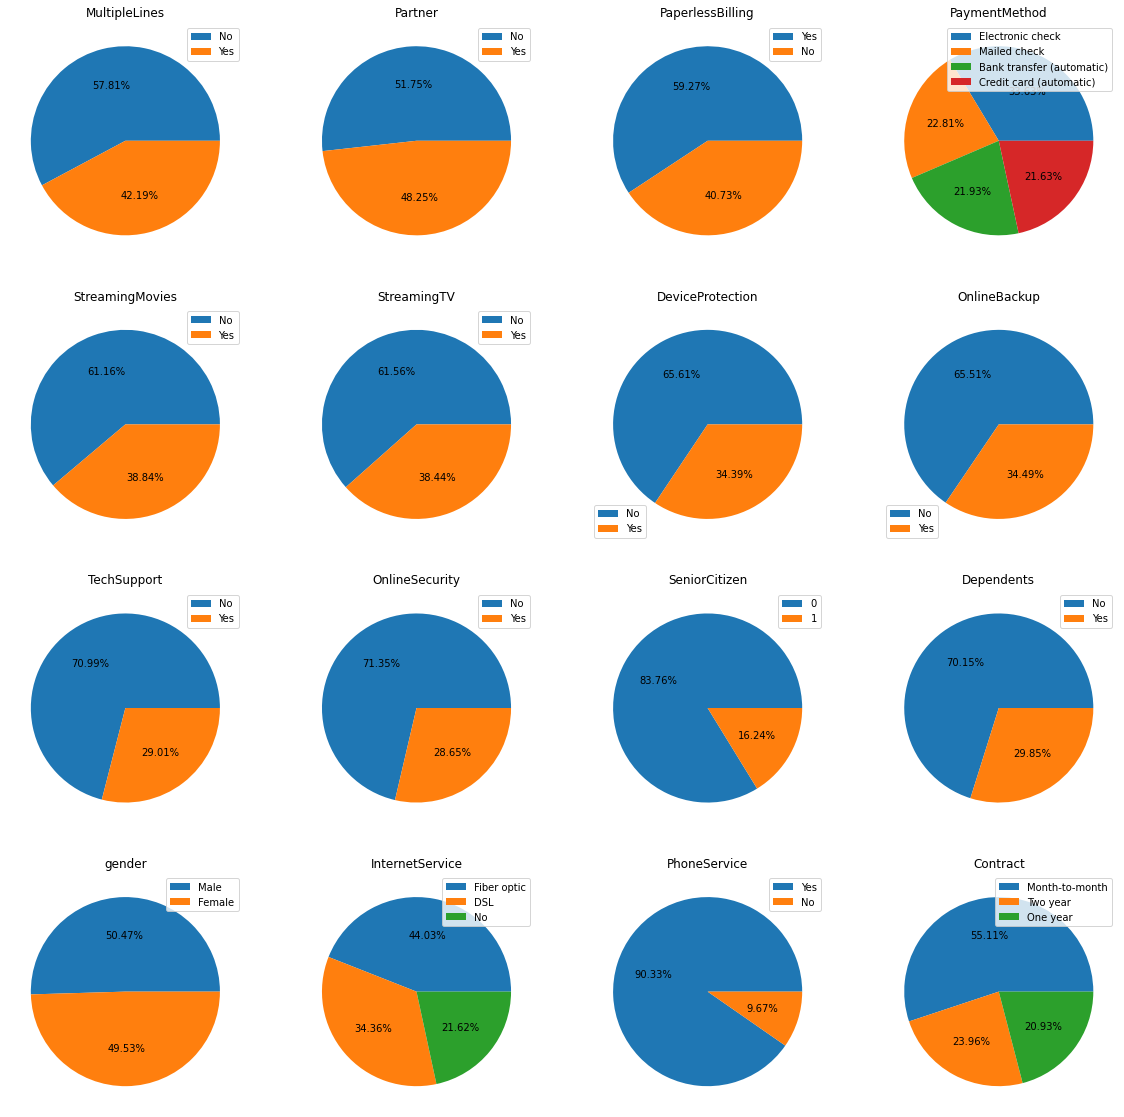

In [ ]:
# 명목변수들의 분포 확인
import math
f, axes = plt.subplots(math.ceil(len(category_feature)/4),4, figsize=(20,20))
for col, ax in zip(category_feature, axes.ravel()):
        data = file[col].value_counts().values.tolist()
        labels = file[col].value_counts().index.tolist()
        ax.pie(data,autopct='%0.2f%%')
        ax.set_title(col)
        ax.legend(labels,loc='best')

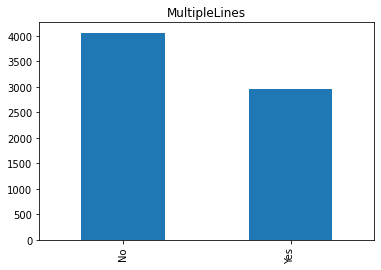

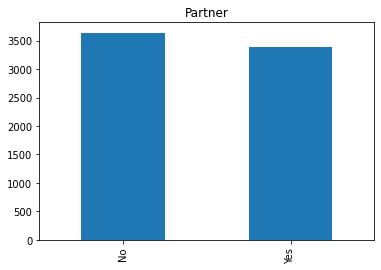

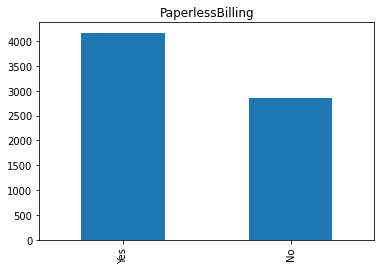

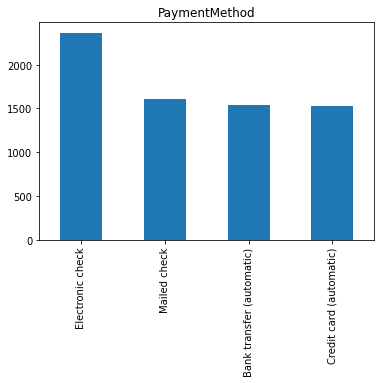

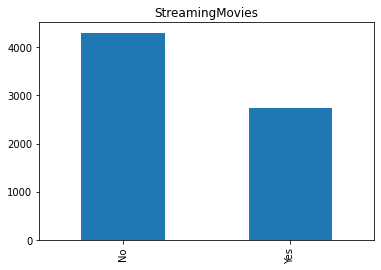

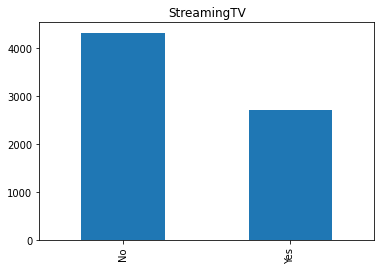

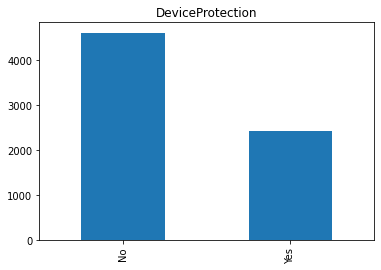

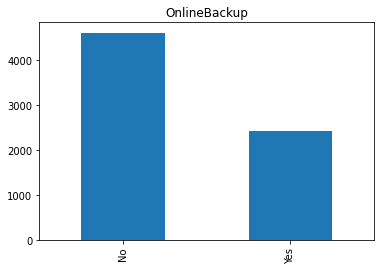

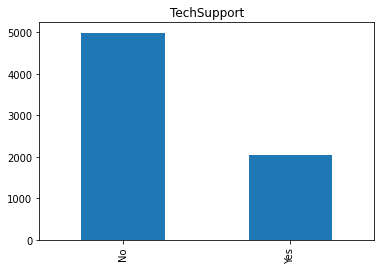

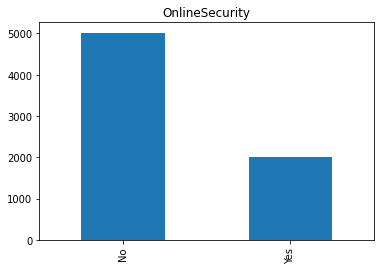

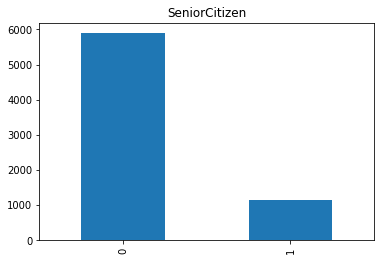

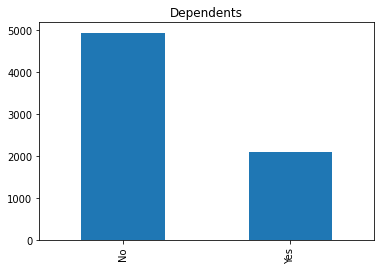

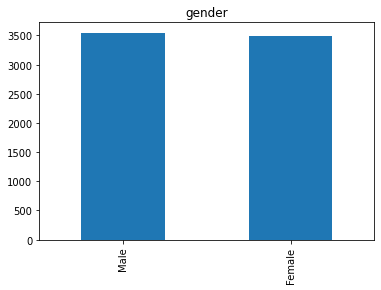

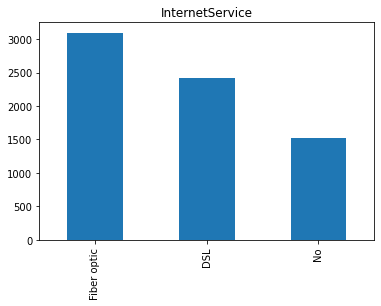

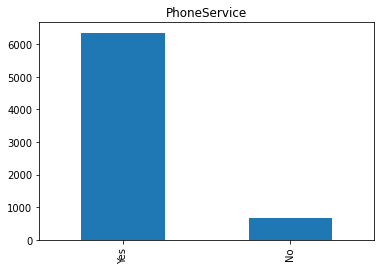

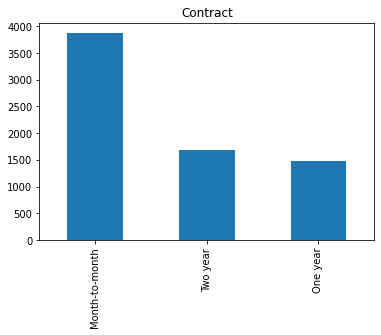

In [ ]:
for col in category_feature:
    file[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

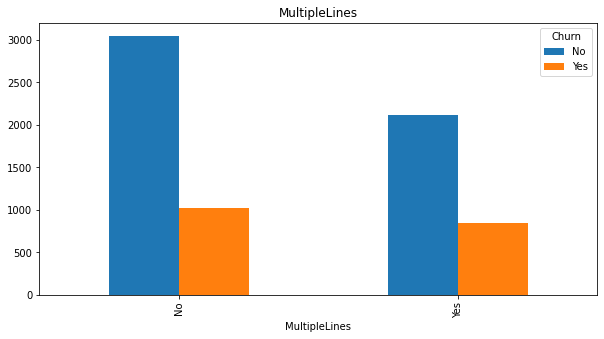

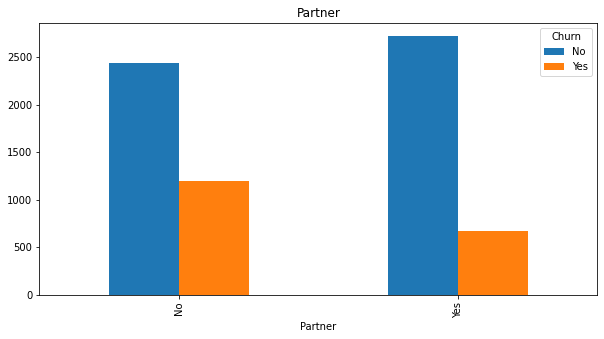

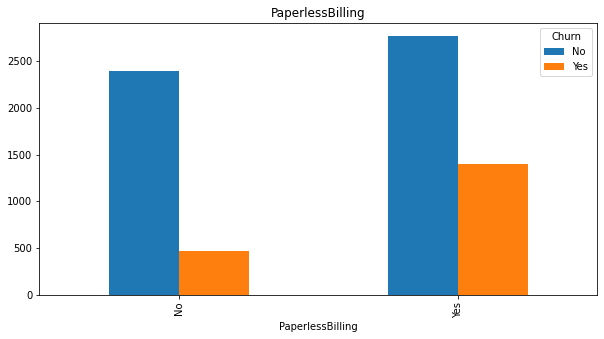

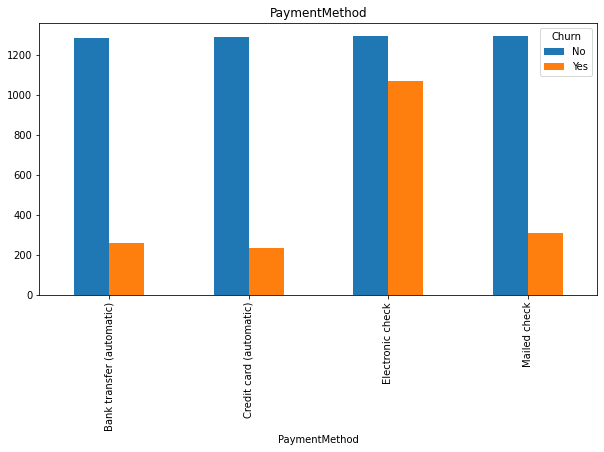

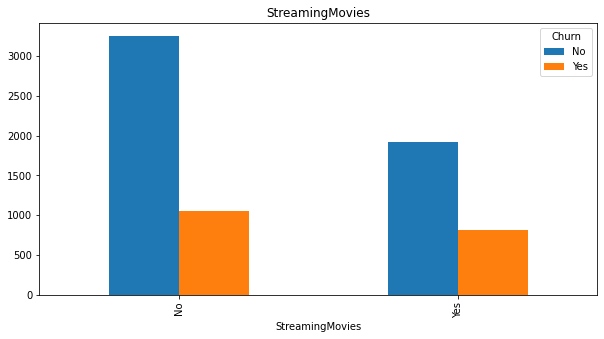

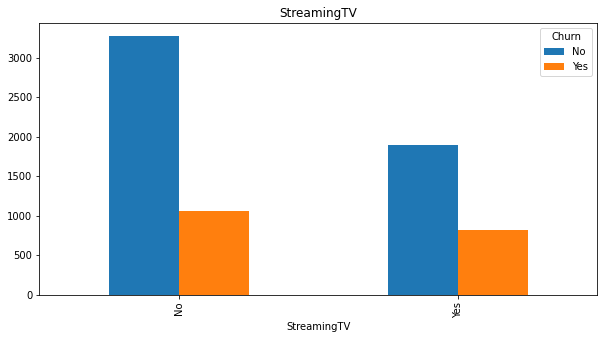

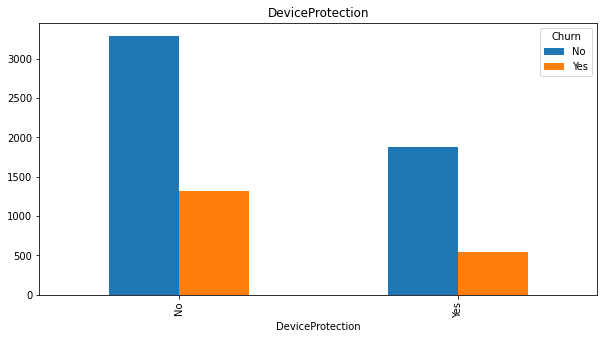

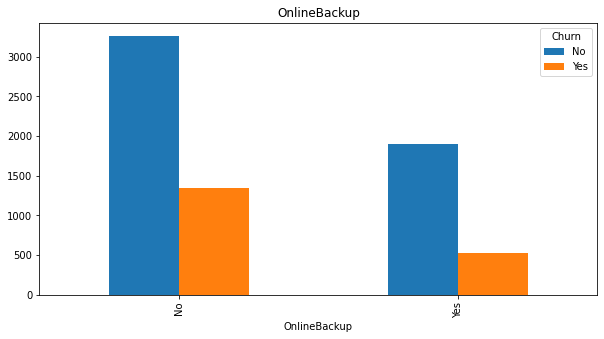

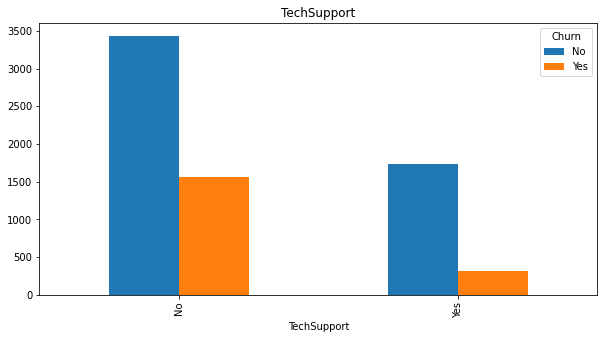

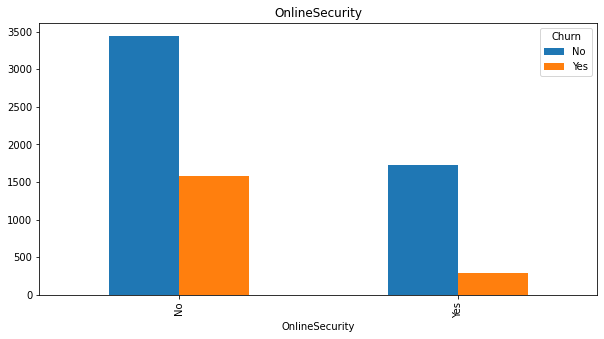

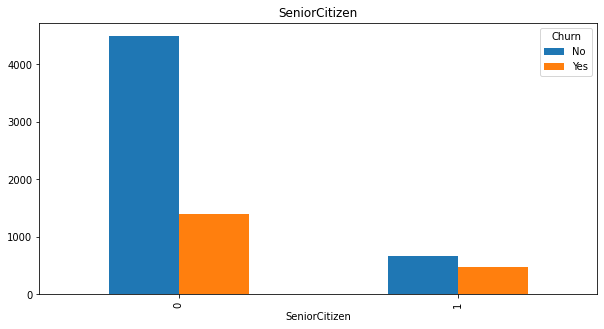

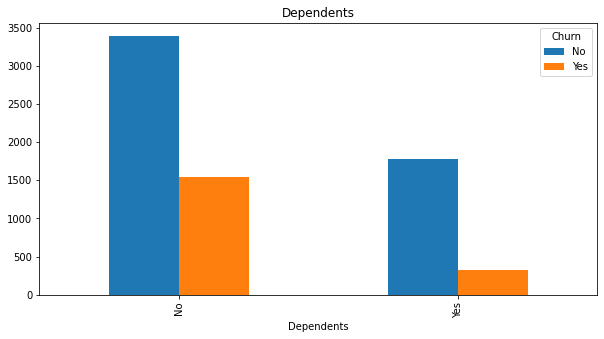

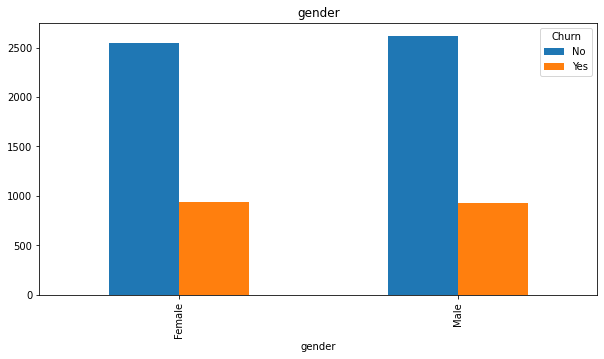

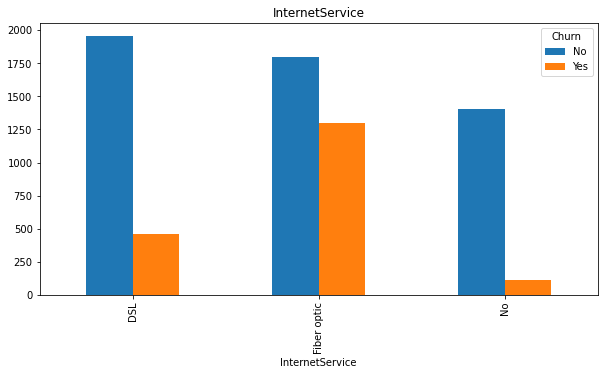

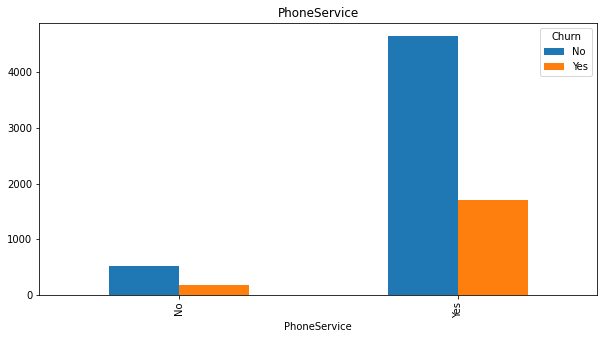

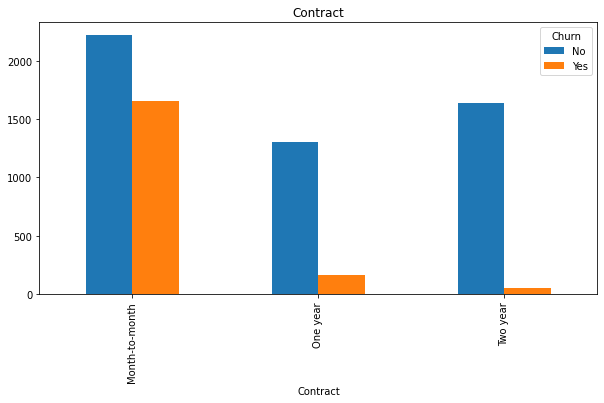

In [ ]:
# 명목변수별 churn 이탈율 차이 확인
for col in category_feature:
  col_df = file.groupby([col,'Churn'])['Churn'].count().unstack('Churn')
  col_df.plot(kind='bar', figsize=(10,5))
  plt.title(col)
  plt.show()

##3)연속형 변수 파악

In [ ]:
numerical_feature = list(set(file.columns) - set(category_feature) - set(['customerID','Churn']))
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['MonthlyCharges', 'TotalCharges', 'churn_re', 'tenure'],
      dtype='<U14')

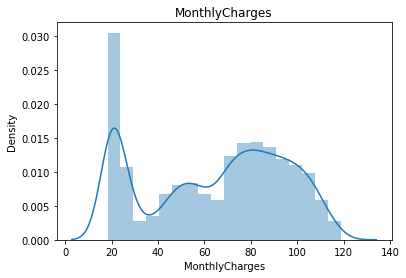

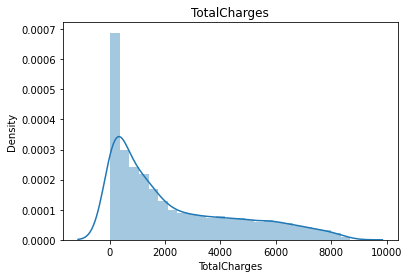

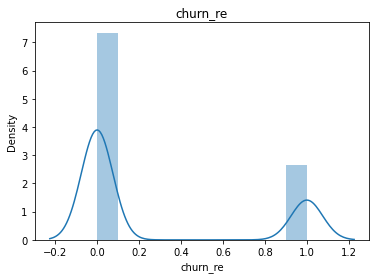

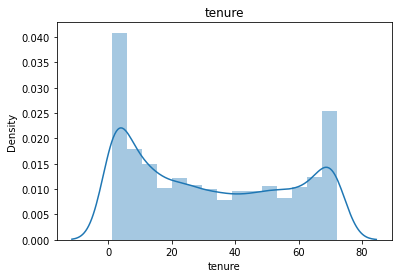

In [ ]:
for col in numerical_feature:
    sns.distplot(file.loc[file[col].notnull(), col])
    plt.title(col)
    plt.show()

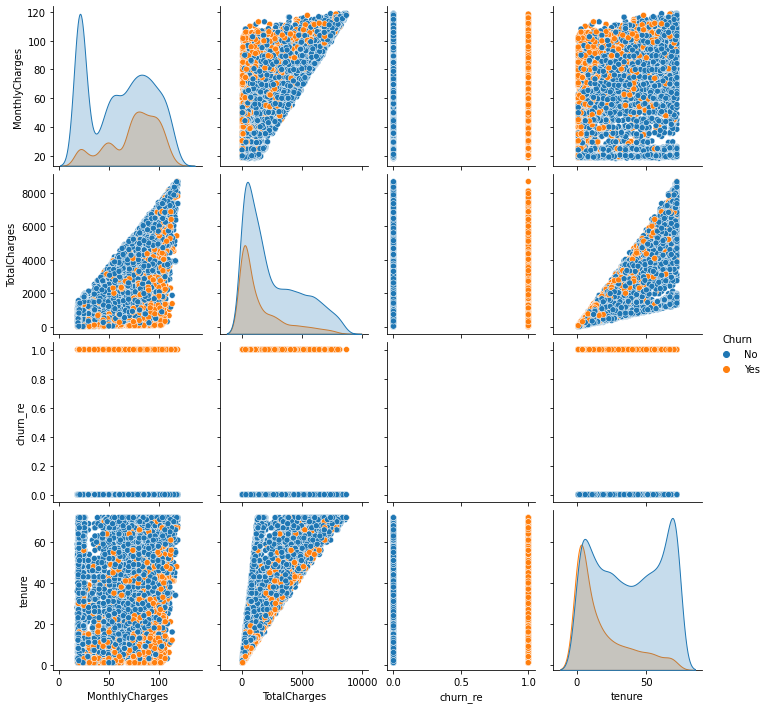

In [ ]:
sns.pairplot(file[list(numerical_feature) + ['Churn']], hue='Churn', 
             x_vars=numerical_feature, y_vars=numerical_feature)
plt.show()

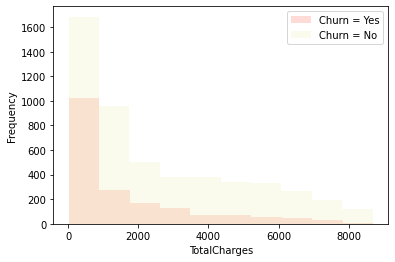

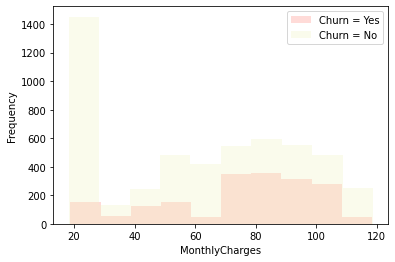

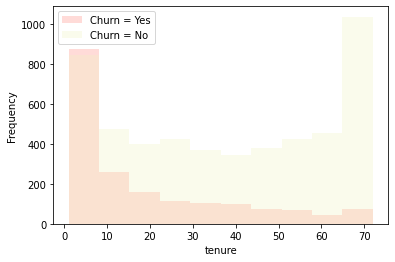

In [ ]:
# array(['MonthlyCharges', 'TotalCharges', 'churn_re', 'tenure'],
file[file['churn_re'] == 1].TotalCharges.plot(kind = 'hist', alpha = 0.3, color = '#FF8A80', label = 'Churn = Yes')
file[file['churn_re'] == 0].TotalCharges.plot(kind = 'hist', alpha = 0.3, color = '#F0F4C3', label = 'Churn = No')

plt.xlabel('TotalCharges')
plt.legend();
plt.show()

file[file['churn_re'] == 1].MonthlyCharges.plot(kind = 'hist', alpha = 0.3, color = '#FF8A80', label = 'Churn = Yes')
file[file['churn_re'] == 0].MonthlyCharges.plot(kind = 'hist', alpha = 0.3, color = '#F0F4C3', label = 'Churn = No')

plt.xlabel('MonthlyCharges')
plt.legend();
plt.show()

file[file['churn_re'] == 1].tenure.plot(kind = 'hist', alpha = 0.3, color = '#FF8A80', label = 'Churn = Yes')
file[file['churn_re'] == 0].tenure.plot(kind = 'hist', alpha = 0.3, color = '#F0F4C3', label = 'Churn = No')

plt.xlabel('tenure')
plt.legend();
plt.show()

In [ ]:
file.groupby('Churn')[['TotalCharges','MonthlyCharges', 'tenure']].agg(['min', 'max', 'mean'])

TotalCharges                        ... tenure               
               min      max         mean  ...    min max       mean
Churn                                     ...                      
No           18.80  8672.45  2555.344141  ...      1  72  37.650010
Yes          18.85  8684.80  1531.796094  ...      1  72  17.979133

[2 rows x 9 columns]

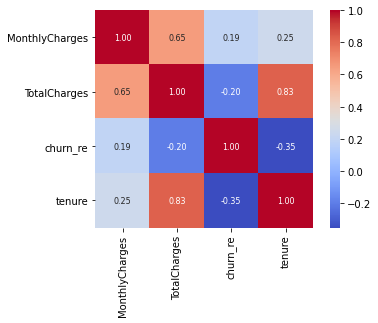

In [ ]:
corr = file[list(numerical_feature)].corr('pearson')
data_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 8}, fmt = '.2f', square = True, cmap = 'coolwarm')

In [ ]:
def half_corr_heatmap(data, title=None):
    plt.figure(figsize=(9,9))
    sns.set(font_scale=1)
    
    mask = np.zeros_like(data.corr())
    mask[np.tril_indices_from(mask)] = True
    
    with sns.axes_style("white"):   
        sns.heatmap(data.corr(), mask=mask, annot=True, cmap="coolwarm")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    plt.show()

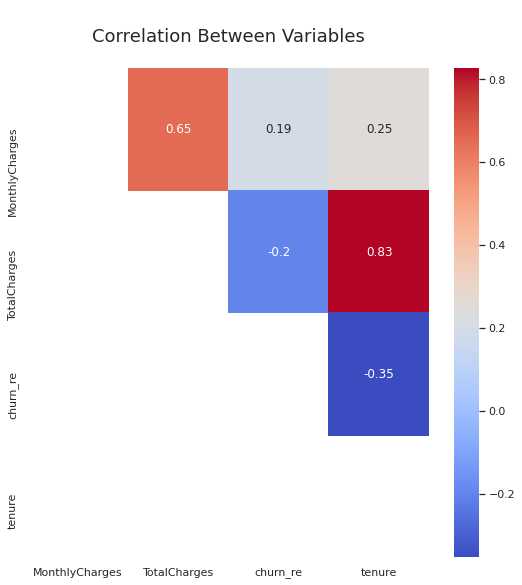

In [ ]:
half_corr_heatmap(file[list(numerical_feature)], 'Correlation Between Variables')

###3-1)Tenure

In [ ]:
# Tenure -> 가입기간이 짧을수록 이탈율은 높음

(0.0, 1.0)

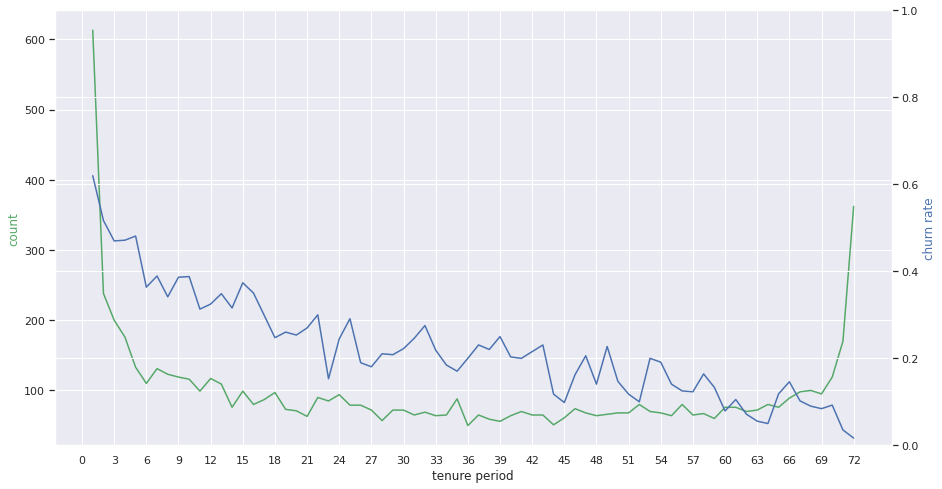

In [ ]:
tenure_sort = file.tenure.value_counts().sort_index() # tenure 내림차순
x = tenure_sort.index 
y1 = tenure_sort.values
y2 = file.groupby('tenure').churn_re.mean().values # 가입기간 별 이탈률 평균

fig, ax1 = plt.subplots(figsize = (15,8))

ax2 = ax1.twinx()

ax1.plot(x,y1,'g-')
ax2.plot(x,y2,'b-')

ax1.set_xticks(range(0,73,3))
ax1.set_xlabel('tenure period')
ax1.set_ylabel('count', color='g')
ax2.set_ylabel('churn rate', color='b')
ax2.set_ylim((0,1))

## 4)명목-연속 분포 대략 확인

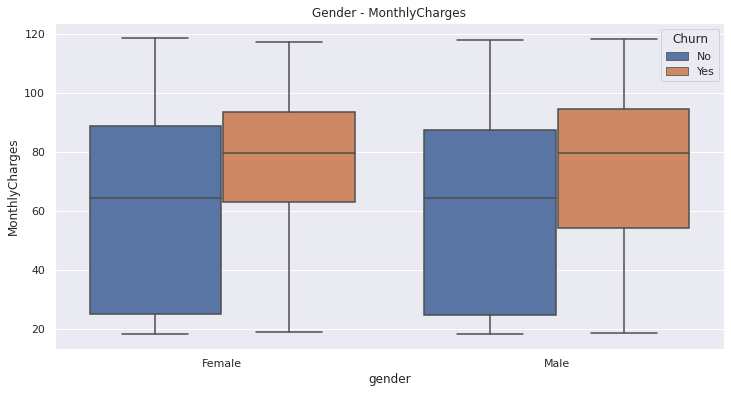

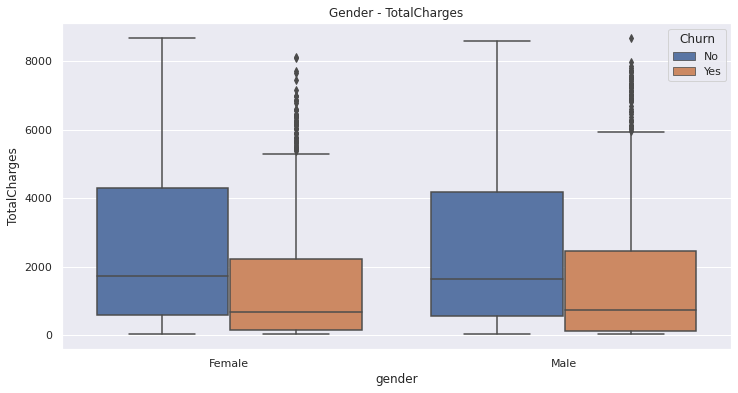

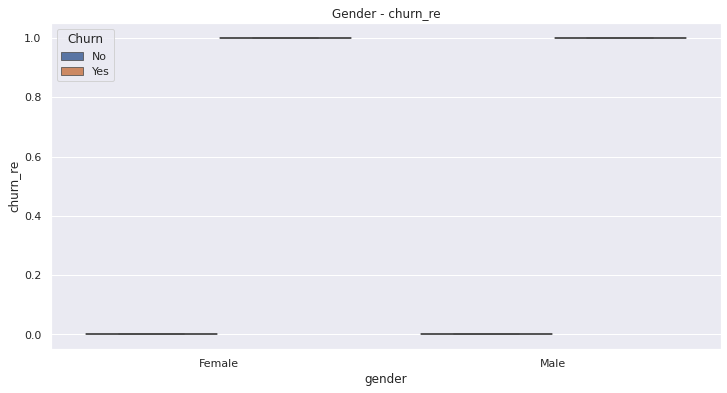

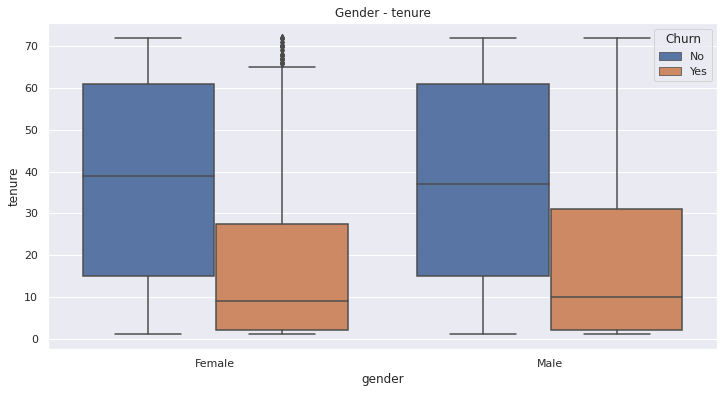

In [ ]:
unique_list = file['gender'].unique()
 
for col in numerical_feature:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='gender', y=col, hue='Churn', data=file.dropna())
    plt.title("Gender - {}".format(col))
    plt.show()

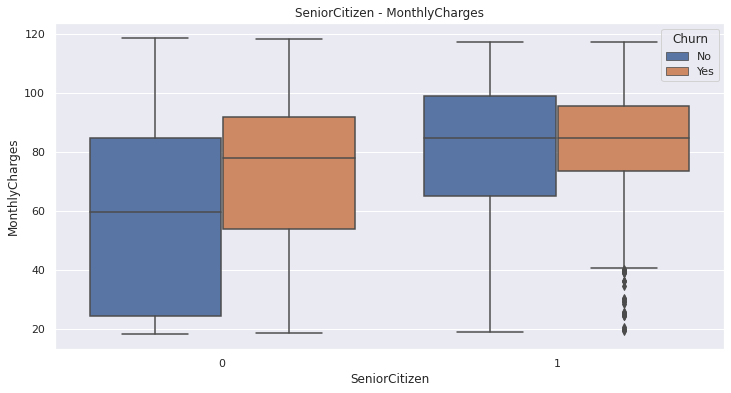

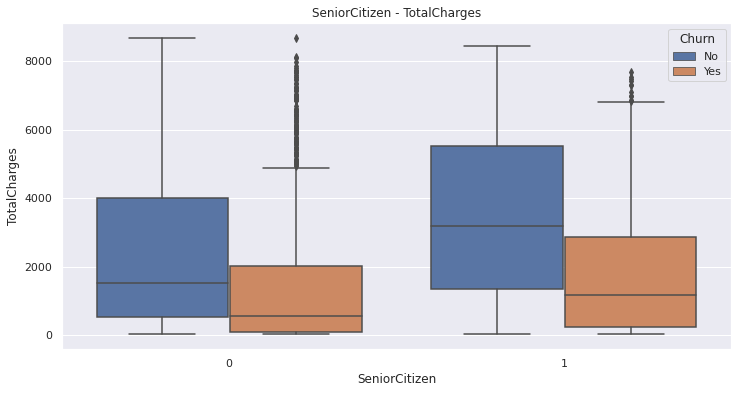

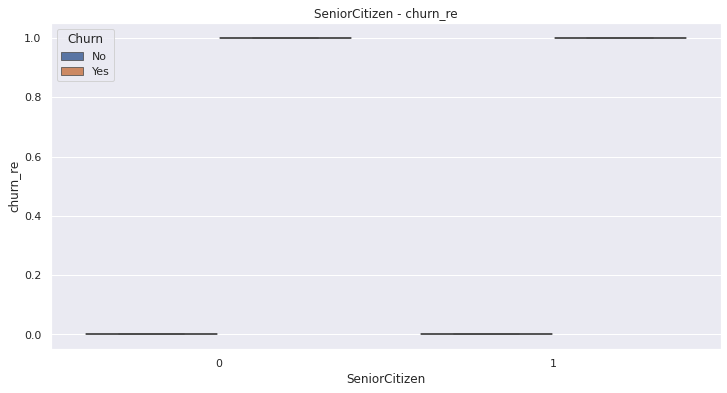

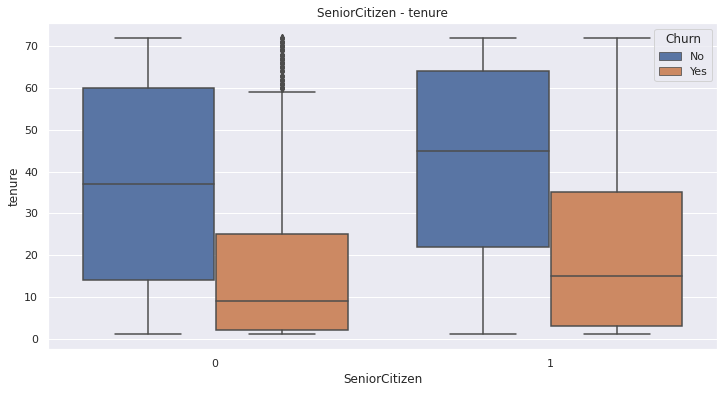

In [ ]:
unique_list = file['SeniorCitizen'].unique()
 
for col in numerical_feature:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='SeniorCitizen', y=col, hue='Churn', data=file.dropna())
    plt.title("SeniorCitizen - {}".format(col))
    plt.show()

In [ ]:
import copy

In [ ]:
##9.필요없는 변수 제거
data = copy.deepcopy(file)
data = data.drop(['gender'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


#3.Data Split

In [ ]:
cols = list(data.columns)
print(len(cols))

X = data.drop(['Churn','churn_re','customerID'],axis=1)
X = pd.get_dummies(X)
X_cols = X.columns
y = data['churn_re'] # churn 종속변수
print(X_cols)

21
Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen_0',
       'SeniorCitizen_1', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [ ]:
from sklearn import preprocessing
x = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scale, columns = X_cols)
X

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.464789,0.385075,0.215867,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.014085,0.354229,0.010310,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.619718,0.239303,0.210241,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.323944,0.662189,0.227521,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,1.000000,0.845274,0.847461,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,0.140845,0.112935,0.037809,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,0.042254,0.558706,0.033210,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


##1)SEED 일정하게 설정

In [ ]:
import numpy as np
import random as rn

In [ ]:
seed_num=123
np.random.seed(seed_num)
rn.seed(seed_num)

#4.Model Selection_ML

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.metrics import f1_score,confusion_matrix,classification_report,accuracy_score,recall_score,precision_score
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

##1.Logistic Regression

help(LogisticRegression)

random_state=None, solver='lbfgs', max_iter=100, multi_class='auto'

1. random_state=123 : seed값 지정  
2. solver='lbfgs' : 모델 최적화 알고리즘 
  {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, default='lbfgs'
  일반 데이터셋 : lbfgs
  빅 데이터셋 : 'sag', 'saga'
3. max_iter=100 : 반복학습 횟수 
4. multi_class='auto' : 이항분류 or 다항분류 
   multi_class : {'auto', 'ovr', 'multinomial'}, default='auto'


In [ ]:
# 파라메터 후보
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l2']}

# 그리드 서치 진행
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')        

lr_grid_model = grid_search.fit(X_train, y_train)
lr_score = grid_search.score(X_test, y_test)

print('best lr_score = ',lr_score) # best lr_score =  0.628099173553719

print(confusion_matrix(grid_search.predict(X_test), y_test))
print(classification_report(grid_search.predict(X_test), y_test))
print('best parameter =', lr_grid_model.best_params_)

ValueError: ignored

In [ ]:
'''
best lr_score =  0.628099173553719
[[1363  284]
 [ 121  342]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1647
           1       0.55      0.74      0.63       463

    accuracy                           0.81      2110
   macro avg       0.73      0.78      0.75      2110
weighted avg       0.84      0.81      0.82      2110

best parameter = {'C': 1, 'penalty': 'l2'}
'''

## 2.xGboost (with GridSearchCV)

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score,classification_report,f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:
obj = XGBClassifier() # default params

# parameter 설정
params = {'colsample_bytree' : [0.6,0.8,1],
          'n_estimators':[100,150,200],
          'max_depth':[3,5,7],
          'min_child_weight': [0.5, 1, 2],
          'learning_rate' : [0.01, 0.05, 0.1]} # dict

eval_set = [(X_test, y_test)]

grid = GridSearchCV(estimator=obj, param_grid = params, cv=5, scoring='f1',n_jobs=-1)

grid_model = grid.fit(X=X_train, y=y_train, verbose=True)

print('best score = ', grid_model.best_score_)
print('best parameter =', grid_model.best_params_)
'''
best score =  0.5598616013483271
best parameter = {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 100}
'''

KeyboardInterrupt: ignored

In [ ]:
obj = XGBClassifier(colsample_bytree= 0.6, learning_rate= 0.05, max_depth= 5, min_child_weight= 2, n_estimators= 100)
model = obj.fit(X=X_train, y=y_train)

# 4. model 평가 
y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

In [ ]:
fscore = model.get_booster().get_fscore()
print('fscore =', fscore)

plt.figure(figsize=(500, 200))
plot_importance(booster=model)
plt.show()

# TotalCharge, MonthlyCharge, Tenure, Contract Month-to-Month

## 3.RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier # model
import matplotlib.pyplot as plt

In [ ]:
# train set으로 모델 생성
rfc = RandomForestClassifier(n_estimators=100, random_state=123)
model = rfc.fit(X=X_train, y=y_train)

# test set 예측 및 평가
predicted = model.predict(X_test)

con_max = confusion_matrix(y_test, predicted)
print(con_max)

print(classification_report(y_test, predicted))

print('중요도 :', model.feature_importances_)

feature_importance_ = pd.DataFrame({'Importance' : RandomForestClassifier().fit(X, y).feature_importances_}, index = X.columns)

feature_importance_.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = '#FF8A80', figsize = (10, 5))
plt.xlabel("Feature Importance by RF", color = "#FF8A80", fontdict= {"fontsize" : 20});

In [ ]:
# 1. RF 객체 생성
rfc = RandomForestClassifier() # default params

# 2. Grid Search Parameter 생성
params = {'n_estimators' :[100,150,200,300],
          'max_depth':[None,3,5,7],
          'min_samples_leaf':[3,5,7,9],
          'min_samples_split':[2,3,4,5],
          'max_features' : ['auto', 'sqrt']} # dict

# 2. GridSearchCV 객체 생성
grid = GridSearchCV(estimator=rfc, param_grid=params,cv=5, return_train_score = True)

# 3. GridSearchCV model
grid_model = grid.fit(X_train,y_train)

# 4. Best Hyper parameter -> 훈련세트에서 수행한 교차검증의 평균 정확도
print('best score = ', grid_model.best_score_)
print('best parameters =', grid_model.best_params_)

# 5. model evaluation -> 최적 매개변수 적용 후, 훈련한 최종 모델에 테스트데이터 평가
print('test set score: {}'.format(grid_model.score(X_test,y_test)))

best score =  0.8057735958070241
best parameters = {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 100}
test set score: 0.7914691943127962


## 4.KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

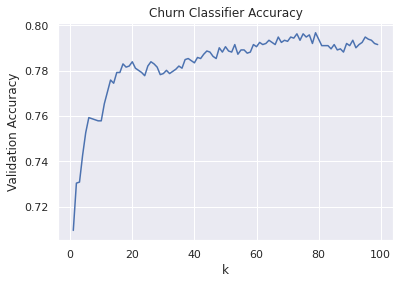

In [ ]:
k_list = range(1,101)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  accuracies.append(classifier.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Churn Classifier Accuracy")
plt.show()

In [ ]:
testscores = []
trainscores = []
test_f1 = []
train_f1 = []

for i in range(1, 101):
    model = KNeighborsClassifier(i)
    model.fit(X_train, y_train)
    
    test_pred = model.predict(X_test)
    train_pred = model.predict(X_train)
    
    testscores.append(metrics.accuracy_score(y_test, test_pred))
    trainscores.append(metrics.accuracy_score(y_train, train_pred))
    test_f1.append(metrics.f1_score(y_test, test_pred))
    train_f1.append(metrics.f1_score(y_train, train_pred))

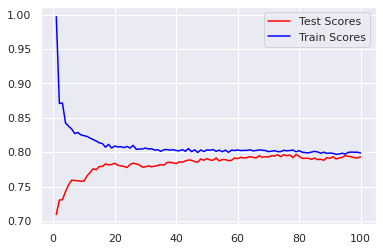

In [ ]:
plt.plot(range(1, 101), testscores, label = 'Test Scores', color = 'red')
plt.plot(range(1, 101), trainscores, label = 'Train Scores', color = 'blue')
plt.legend()

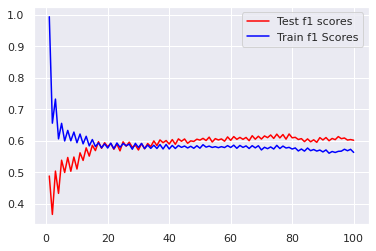

In [ ]:
plt.plot(range(1, 101), test_f1, label = 'Test f1 scores', color = 'red')
plt.plot(range(1, 101), train_f1, label = 'Train f1 Scores', color = 'blue')
plt.legend()

In [ ]:
knn = KNeighborsClassifier(18)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

In [ ]:
knn_as = metrics.accuracy_score(y_test, y_pred_knn)
knn_as_train = metrics.accuracy_score(y_train, y_pred_knn_train)

In [ ]:
print(f"Accuracy score for test data : {knn_as}")
print(f"Accuracy score for train data : {knn_as_train}")

# Accuracy score for test data : 0.7815165876777251
# Accuracy score for train data : 0.8112555871596911
# test/train accuracy 차이가 있으니 f1_score로 측정

Accuracy score for test data : 0.7815165876777251
Accuracy score for train data : 0.8112555871596911


In [ ]:
metrics.confusion_matrix(y_test, y_pred_knn)

array([[1335,  149],
       [ 312,  314]])

In [ ]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1484
           1       0.68      0.50      0.58       626

    accuracy                           0.78      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.77      0.78      0.77      2110



In [ ]:
y_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba)

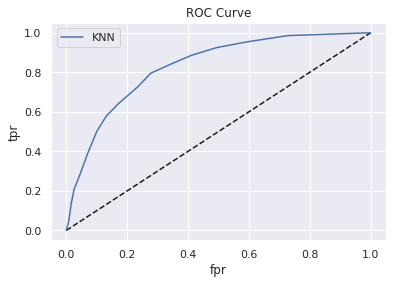

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();

In [ ]:
metrics.roc_auc_score(y_test, y_proba)

0.8275659214798102

In [ ]:
metrics.confusion_matrix(y_pred_knn, y_test)

array([[1335,  312],
       [ 149,  314]])

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 18)
                                  
classifier.fit(X_train, y_train)
f1_score_knn = classifier.score(X_test, y_test)
print(f1_score_knn) # 0.7815165876777251

0.7815165876777251


##5.SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import f1_score, make_scorer

In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 5.2MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=f36925ca87c0411d3014d6e241372b564dc111545567cd19c4ec4565b8a4dc20
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
'''
SVM 하이퍼 파라미터
C:  클수록 정확하게 (마진이 작아짐, 과대적합)
   작을수록 과대적합 방지, alpha (가중치 규제) 의 역수

gamma:  클수록 정확하게 (경사가 급해짐, 과대적합)
  작을수록 과대적합 방지
  비선형 (kernel=‘rbf’, kernel=‘poly’)에서만 이 옵션 사용
'''

'\nSVM 하이퍼 파라미터\nC:  클수록 정확하게 (마진이 작아짐, 과대적합)\n   작을수록 과대적합 방지, alpha (가중치 규제) 의 역수\n\ngamma:  클수록 정확하게 (경사가 급해짐, 과대적합)\n  작을수록 과대적합 방지\n  비선형 (kernel=‘rbf’, kernel=‘poly’)에서만 이 옵션 사용\n'

    mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0        0.583364      0.023524  ...        0.000571               27
1        0.593622      0.008546  ...        0.000571               27
2        0.619296      0.024109  ...        0.000571               27
3        0.651348      0.020328  ...        0.000571               27
4        0.647233      0.024892  ...        0.007782               17
5        1.091394      0.046801  ...        0.005066               26
6        0.589289      0.026265  ...        0.000571               27
7        0.627516      0.003370  ...        0.000571               27
8        0.634155      0.016412  ...        0.000571               27
9        0.635543      0.019181  ...        0.007487               13
10       0.683642      0.021224  ...        0.014445               14
11       1.250042      0.058425  ...        0.011688               21
12       0.615709      0.018350  ...        0.000571               27
13       0.624180   

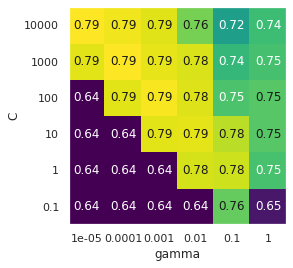

In [ ]:
#1. 학습시킬 모델 생성
m_svm = SVC()

#2. 그리드 서치로 찾을 매개변수 조합 생성
v_parameter = {'C': [0.1, 1, 10, 100,1000,10000],  
               'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

#3. GridSEarchCV 모델 생성
m_gridcv = GridSearchCV(m_svm,        # 학습 모델 
                        v_parameter,  # 학습 모델의 매개변수(딕셔너리 형태)
                        cv=5,           # 교차검증 횟수
                        scoring='f1_weighted')

#4. GridSEarchCV 모델 학습
m_gridcv.fit(X_train, y_train)

#5. 매개변수 확인
df_result = pd.DataFrame(m_gridcv.cv_results_) # 교차검증 과정 확인 
print(df_result)

#6. 최종 모델 평가 
m_gridcv.score(X_test, y_test)  # m_gridcv 모델에 최적의 매개변수 저장
                                # 선택된 매개변수로 재학습 포함 

#7. 그리드 서치 결과 시각화
arr_score = np.array(df_result.mean_test_score).reshape(6,6)
import mglearn
mglearn.tools.heatmap(arr_score, 
                      xlabel='gamma',
                      xticklabels=v_parameter['gamma'],
                      ylabel='C',
                      yticklabels=v_parameter['C'],
                      cmap='viridis')   

In [ ]:
print('optimal hyper parmameter =', m_gridcv.best_params_)    # 최적의 매개변수 조합 확인
print('best score = ', m_gridcv.best_score_)     # 매개변수 선택 시 best_score(CV 포함)

# 하이퍼파라미터 선정에 의문

optimal hyper parmameter = {'C': 10000, 'gamma': 1e-05}
best score =  0.7931075025655215


In [ ]:
X_re = X.iloc[:,0:3]
print(X_re)

        tenure  MonthlyCharges  TotalCharges
0     0.000000        0.115423      0.001275
1     0.464789        0.385075      0.215867
2     0.014085        0.354229      0.010310
3     0.619718        0.239303      0.210241
4     0.014085        0.521891      0.015330
...        ...             ...           ...
7027  0.323944        0.662189      0.227521
7028  1.000000        0.845274      0.847461
7029  0.140845        0.112935      0.037809
7030  0.042254        0.558706      0.033210
7031  0.915493        0.869652      0.787641

[7032 rows x 3 columns]


    mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0        0.273166      0.008089  ...        0.000571               20
1        0.271637      0.004802  ...        0.000571               20
2        0.311877      0.001982  ...        0.000571               20
3        0.324044      0.003979  ...        0.000571               20
4        0.315179      0.002118  ...        0.000571               20
5        0.293151      0.003089  ...        0.000571               20
6        0.271569      0.002369  ...        0.000571               20
7        0.311932      0.003591  ...        0.000571               20
8        0.317910      0.005514  ...        0.000571               20
9        0.325064      0.004094  ...        0.000571               20
10       0.337680      0.008843  ...        0.009980               16
11       0.332682      0.003210  ...        0.000571               20
12       0.304381      0.002059  ...        0.000571               20
13       0.320827   

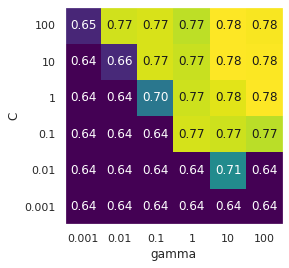

In [ ]:
#1. 학습시킬 모델 생성
m_svm = SVC()

#2. 그리드 서치로 찾을 매개변수 조합 생성
v_parameter = {'C': [0.001, 0.01, 0.1, 1, 10, 100],  
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

#3. GridSEarchCV 모델 생성
m_gridcv = GridSearchCV(m_svm,        # 학습 모델 
                        v_parameter,  # 학습 모델의 매개변수(딕셔너리 형태)
                        cv=5,           # 교차검증 횟수
                        scoring='f1_weighted')

#4. GridSEarchCV 모델 학습
m_gridcv.fit(X_train, y_train)

#5. 매개변수 확인
df_result = pd.DataFrame(m_gridcv.cv_results_) # 교차검증 과정 확인 
print(df_result)

#6. 최종 모델 평가 
m_gridcv.score(X_test, y_test)  # m_gridcv 모델에 최적의 매개변수 저장
                                # 선택된 매개변수로 재학습 포함 

#7. 그리드 서치 결과 시각화
arr_score = np.array(df_result.mean_test_score).reshape(6,6)
import mglearn
mglearn.tools.heatmap(arr_score, 
                      xlabel='gamma',
                      xticklabels=v_parameter['gamma'],
                      ylabel='C',
                      yticklabels=v_parameter['C'],
                      cmap='viridis')   

In [ ]:
print('optimal hyper parmameter =', m_gridcv.best_params_)    # 최적의 매개변수 조합 확인
print('best score = ', m_gridcv.best_score_)     # 매개변수 선택 시 best_score(CV 포함)

optimal hyper parmameter = {'C': 1, 'gamma': 100}
best score =  0.7818793398164627


##6.Keras - y모양을 바꿔야하므로 맨 마지막에 실행할 것

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout 
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

(4922, 2)
(2110, 2)


In [ ]:
tf.random.set_seed(123)

### 6-1 KERAS TUNING

In [ ]:
# 구글에서 발표한 keras tuner를 이용하면 최적의 하이퍼파라미터 검색 가능 but 따로 신청 및 
'''
def model_fn():

    LR = Choice('learning_rate', [0.01, 0.001, 0.0005, 0.0001], group='optimizer')
    DROPOUT_RATE = Linear('dropout_rate', 0.0, 0.5, 5, group='dense')
    NUM_DIMS = Range('num_dims', 8, 32, 4, group='dense')
    NUM_LAYERS = Range('num_layers', 1, 3, group='dense')

    model = Sequential()

    model.add(Flatten())
    model.add(Dense(18, input_shape=(37,), activation='relu'))
    for _ in range(NUM_LAYERS):
        model.add(Dense(NUM_DIMS, activation='relu'))
        model.add(Dropout(DROPOUT_RATE))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(LR))

    return model

tuner = Tuner(model_fn, 'val_accuracy', epochs_budget=500, max_epochㄴ=5)
tuner.search(train_data,validation_data=validation_data)
'''


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model = Sequential()

# hidden layer1 : [37, 18] -> [in, node]
model.add(Dense(18, input_shape=(37,), activation='relu')) # 1층
Dropout(rate = 0.4) 

# output layer
model.add(Dense(2, activation='sigmoid')) # 2층

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001)
                 ,loss=tf.keras.losses.binary_crossentropy
                 ,metrics=['acc',f1_m,precision_m, recall_m])

# model dnn layer 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                684       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 38        
Total params: 722
Trainable params: 722
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model_fit = model.fit(X_train, y_train,
          epochs = 100,
          verbose = 1,
          validation_data = (X_test, y_test),
          callbacks = callback)

loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test)
print('f1_score =', f1_score)
print('val loss =', loss)

Epoch 1/100
154/154 [==============================] - 2s 5ms/step - loss: 0.5961 - acc: 0.7262 - f1_m: 0.7176 - precision_m: 0.6793 - recall_m: 0.7868 - val_loss: 0.4944 - val_acc: 0.7564 - val_f1_m: 0.7215 - val_precision_m: 0.7908 - val_recall_m: 0.6654
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4711 - acc: 0.7771 - f1_m: 0.7556 - precision_m: 0.8065 - recall_m: 0.7126 - val_loss: 0.4443 - val_acc: 0.7957 - val_f1_m: 0.7854 - val_precision_m: 0.7951 - val_recall_m: 0.7763
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4276 - acc: 0.7984 - f1_m: 0.7988 - precision_m: 0.8075 - recall_m: 0.7908 - val_loss: 0.4330 - val_acc: 0.7981 - val_f1_m: 0.7961 - val_precision_m: 0.7972 - val_recall_m: 0.7953
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4289 - acc: 0.7897 - f1_m: 0.7904 - precision_m: 0.7920 - recall_m: 0.7893 - val_loss: 0.4302 - val_acc: 0.7976 - val_f1_m: 0.7985 - val_precision_m: 0.

dict_keys(['loss', 'acc', 'f1_m', 'precision_m', 'recall_m', 'val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m'])


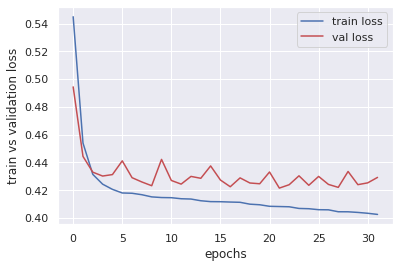

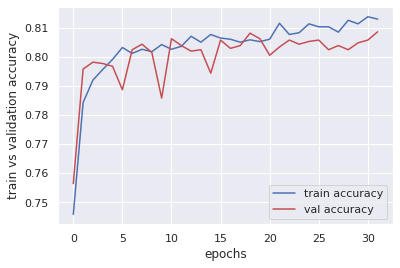

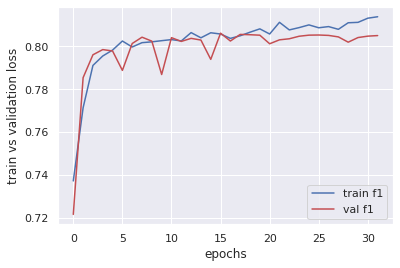

In [ ]:
print(model_fit.history.keys())

# loss vs val_loss
plt.plot(model_fit.history['loss'], 'b', label='train loss')
plt.plot(model_fit.history['val_loss'], 'r', label='val loss')
plt.xlabel('epochs')
plt.ylabel('train vs validation loss')
plt.legend(loc = 'best')
plt.show()

# f1 vs val_f1
plt.plot(model_fit.history['f1_m'], 'b', label='train f1')
plt.plot(model_fit.history['val_f1_m'], 'r', label='val f1')
plt.xlabel('epochs')
plt.ylabel('train vs validation loss')
plt.legend(loc = 'best')
plt.show()

In [ ]:
model2 = Sequential()

# hidden layer1 : [37, 18] -> [in, node]
model2.add(Dense(18, input_shape=(37,), activation='relu')) # 1층
Dropout(rate = 0.5) 

# hidden layer2 : [18, 9] -> [in, node]
model2.add(Dense(9, activation='relu')) # 2층
Dropout(rate = 0.3) 

# hidden layer3 : [9, 4] -> [in, node]
model2.add(Dense(4, activation='relu')) # 3층
Dropout(rate = 0.3) 

# output layer
model2.add(Dense(2, activation='sigmoid')) # 4층

model2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001)
                 ,loss=tf.keras.losses.binary_crossentropy
                 ,metrics=['acc',f1_m,precision_m, recall_m])

# model dnn layer 확인
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 18)                684       
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 171       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 40        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 10        
Total params: 905
Trainable params: 905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model2_fit = model2.fit(X_train, y_train, # 훈련셋
          epochs = 100, # 반복학습 수
          verbose = 1, # 콘솔 출력
          validation_data = (X_test, y_test),
          callbacks = callback)

# 7. model evaulation : test dataset
loss, accuracy, f1_score, precision, recall = model2.evaluate(X_test, y_test)
print('f1_score =', f1_score)
print('loss =', loss)

Epoch 1/100
154/154 [==============================] - 2s 7ms/step - loss: 0.6933 - acc: 0.6371 - f1_m: 0.5065 - precision_m: 0.6597 - recall_m: 0.4537 - val_loss: 0.6657 - val_acc: 0.7033 - val_f1_m: 0.6989 - val_precision_m: 0.7016 - val_recall_m: 0.6962
Epoch 2/100
154/154 [==============================] - 1s 4ms/step - loss: 0.6539 - acc: 0.7406 - f1_m: 0.7381 - precision_m: 0.7402 - recall_m: 0.7360 - val_loss: 0.6353 - val_acc: 0.7237 - val_f1_m: 0.7239 - val_precision_m: 0.7257 - val_recall_m: 0.7223
Epoch 3/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6180 - acc: 0.7809 - f1_m: 0.7811 - precision_m: 0.7813 - recall_m: 0.7809 - val_loss: 0.5909 - val_acc: 0.7981 - val_f1_m: 0.7982 - val_precision_m: 0.7977 - val_recall_m: 0.7987
Epoch 4/100
154/154 [==============================] - 1s 4ms/step - loss: 0.5830 - acc: 0.7896 - f1_m: 0.7896 - precision_m: 0.7886 - recall_m: 0.7906 - val_loss: 0.5460 - val_acc: 0.7943 - val_f1_m: 0.7976 - val_precision_m: 0.

dict_keys(['loss', 'acc', 'f1_m', 'precision_m', 'recall_m', 'val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m'])


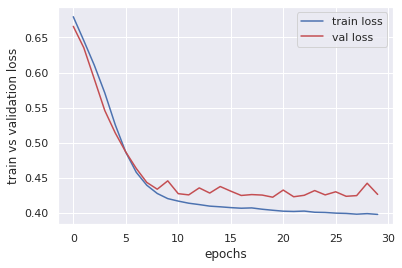

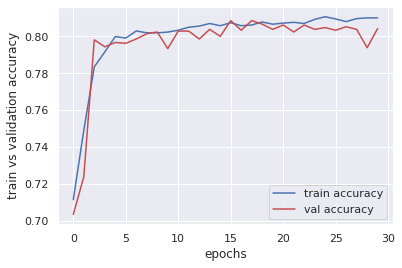

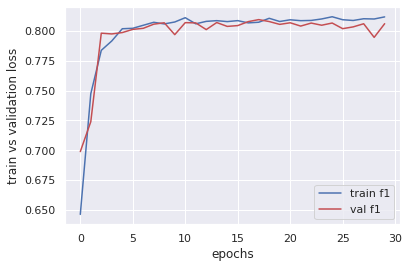

In [ ]:
print(model2_fit.history.keys())

# loss vs val_loss
plt.plot(model2_fit.history['loss'], 'b', label='train loss')
plt.plot(model2_fit.history['val_loss'], 'r', label='val loss')
plt.xlabel('epochs')
plt.ylabel('train vs validation loss')
plt.legend(loc = 'best')
plt.show()

# f1 vs val_f1
plt.plot(model2_fit.history['f1_m'], 'b', label='train f1')
plt.plot(model2_fit.history['val_f1_m'], 'r', label='val f1')
plt.xlabel('epochs')
plt.ylabel('train vs validation loss')
plt.legend(loc = 'best')
plt.show()

## 미적합 - Decision Tree

In [ ]:
from sklearn.tree.export import export_text # tree 텍스트 구조
from sklearn import tree # tree 시각화 

In [ ]:
obj = DecisionTreeClassifier(criterion='gini', max_depth = 5, random_state=123) 
tree_model = obj.fit(X = X_train, y = y_train)

dt_train_score = tree_model.score(X = X_train, y = y_train)
dt_test_score = tree_model.score(X = X_test, y = y_test)

# max_depth = 5, gini
print(dt_train_score) # 0.8039414872003251
print(dt_test_score) # 0.7758293838862559

0.8041446566436408
0.7753554502369668


In [ ]:
obj = DecisionTreeClassifier(criterion='entropy', max_depth = 5, random_state=123) 
tree_model = obj.fit(X = X_train, y = y_train)

dt_train_score = tree_model.score(X = X_train, y = y_train)
dt_test_score = tree_model.score(X = X_test, y = y_test)

# max_depth = 5, gini
print(dt_train_score) # 0.8035351483136937
print(dt_test_score) # 0.776303317535545

0.8035351483136937
0.776303317535545


|--- Contract_Month-to-month <= 0.50
|   |--- MonthlyCharges <= 0.75
|   |   |--- Contract_One year <= 0.50
|   |   |   |--- PaymentMethod_Electronic check <= 0.50
|   |   |   |   |--- MonthlyCharges <= 0.74
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- MonthlyCharges >  0.74
|   |   |   |   |   |--- class: 0
|   |   |   |--- PaymentMethod_Electronic check >  0.50
|   |   |   |   |--- TotalCharges <= 0.36
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- TotalCharges >  0.36
|   |   |   |   |   |--- class: 0
|   |   |--- Contract_One year >  0.50
|   |   |   |--- InternetService_No <= 0.50
|   |   |   |   |--- MonthlyCharges <= 0.06
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- MonthlyCharges >  0.06
|   |   |   |   |   |--- class: 0
|   |   |   |--- InternetService_No >  0.50
|   |   |   |   |--- TotalCharges <= 0.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- TotalCharges >  0.00
|   |   |   |   |   |--- class: 0
|   |--- MonthlyCharges >  0.75
|   |

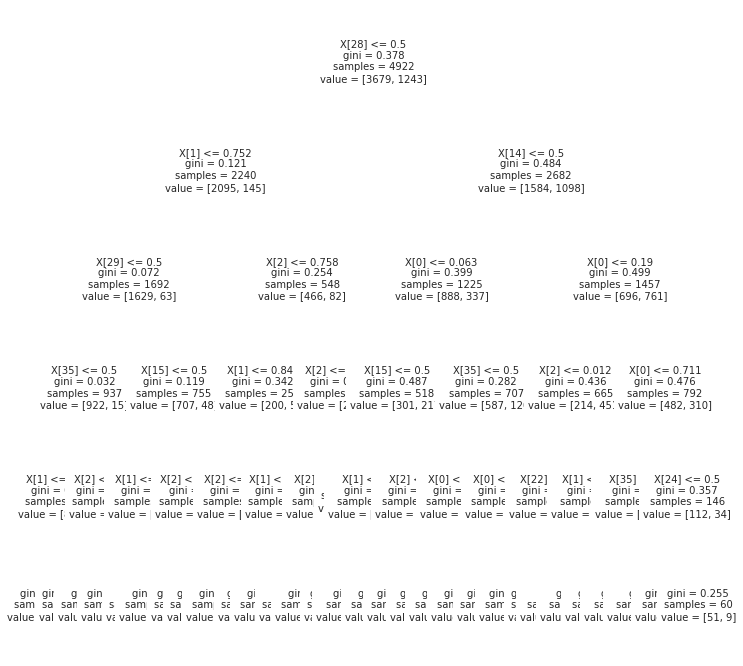

In [ ]:
x_cols = list(X.columns)
r = export_text(tree_model, feature_names = x_cols)
print(r)

fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(tree_model,fontsize=10)

# 4. model 평가
y_pred = tree_model.predict(X = X_test)
dt_acc = accuracy_score(y_test, y_pred)
print('acc =', dt_acc) # dt_acc = 0.7758293838862559

dt_f1_score = f1_score(y_test, y_pred)
print('decision tree f1 score =',dt_f1_score)

## 미적합 - NBGuassian

In [ ]:
# GuassianNB : x변수가 연속확률분포(정규분포)인 경우 적용
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.predict(X_test)
gnb.score(X_test, y_test)

0.7018957345971564

# 부록: pipeline 이용 - 추후 활용

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

pipe = Pipeline(steps = [('scaler', scaler),
                         ('classifier', LogisticRegression())])

param_grid = [{'classifier': [SVC()], 
              'classifier__gamma': [0.01, 0.1, 1, 10, 100], 
              'classifier__C': [0.01, 0.1, 1, 10, 100]
              },

               {'classifier': [LogisticRegression()],
               'classifier__C': [0.01, 0.1, 1, 10]
               },

              {'classifier': [RandomForestClassifier()],
              'classifier__max_depth': [3, 4, 5], # max_depth: The maximum depth of the tree.
              'classifier__n_estimators': [50, 100], # n_estimators: The number of trees in the forest.
              'classifier__min_samples_split': [50, 100]
              }] # min_samples_split: The minimum number of samples required to split an internal node       

grid = GridSearchCV(pipe, param_grid, scoring = 'f1_weighted', cv=5)  
grid.fit(X_train, y_train)

print(grid.best_params_)

print('학습평가 : ', grid.score(X_train, y_train))
print('테스트평가 :', grid.score(X_test, y_test))

{'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__max_depth': 5, 'classifier__min_samples_split': 50, 'classifier__n_estimators': 100}
학습평가 :  0.8542521458028509
테스트평가 : 0.8526949872118358
